# Model

\begin{align}
\dfrac{dC}{dt}&= p - dC - \left(\dfrac{a_SCS}{1+a_Sh_SC+a_Sh_SF}\right) - \left(\dfrac{a_TCT}{1+a_Th_TC+a_Th_TO}\right) \\
\dfrac{dF}{dt}&= r_FF\left(1-\dfrac{F}{K_F}\right) - \left(\dfrac{a_SFS}{1+a_Sh_SC+a_Sh_SF}\right) \\
\dfrac{dT}{dt}&= \left(\dfrac{a_T(S)CT + a_TOT}{1+a_T(S)h_TC+a_Th_TO}\right) - m_TT - q_TT^2 \\
\dfrac{dS}{dt}&= \left(\dfrac{a_S(T)CS + a_SFS}{1+a_S(T)h_SC+a_Sh_SF}\right) - m_SS - q_SS^2
\end{align}

with $a_T(S)$ and $a_S(T)$ either

\begin{align*}
a_T(S)=\lambda_T\exp{(-\alpha S)} \\
a_S(T)=\lambda_S\exp{(-\beta T)}
\end{align*}

or

\begin{align*}
a_T(S)=a_T \\
a_S(T)=a_S
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp  # to solve ODE system
from SALib.sample.morris import sample as ee_sample
from tqdm import tqdm

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork') #grade3

In [2]:
seed = 1234
step = 4000
time_list = np.linspace(0, 200, step)
num_of_points = 1000
method = "LSODA"

# Main analyses

# Exponential Density-Mediated Interaction

## Parameter values

lambda_T=0.1
lambda_S=1
alpha=0.1
beta=1
p=10
d=1
a_S=1
h_S=1
a_T=10
h_T=0.1
O=0.07
r_F=1
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([0.0617073, 0.302595, 49.0135, 1.32302]) 

In [3]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [4]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [5]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


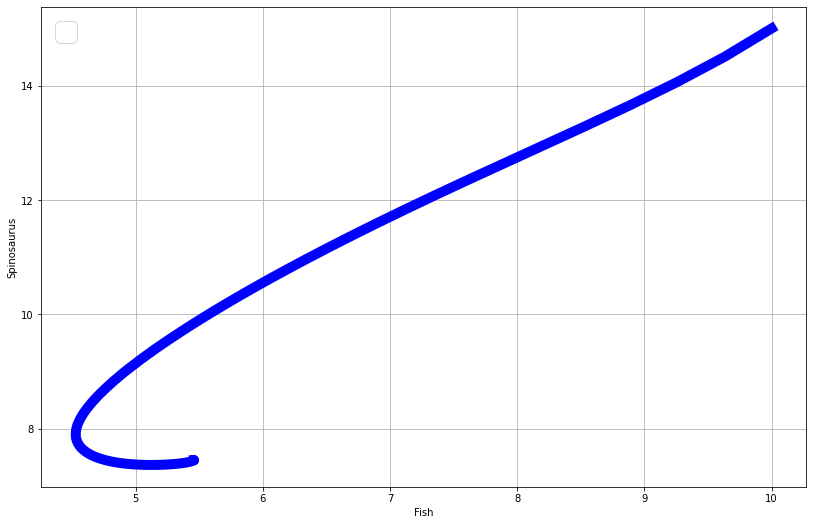

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


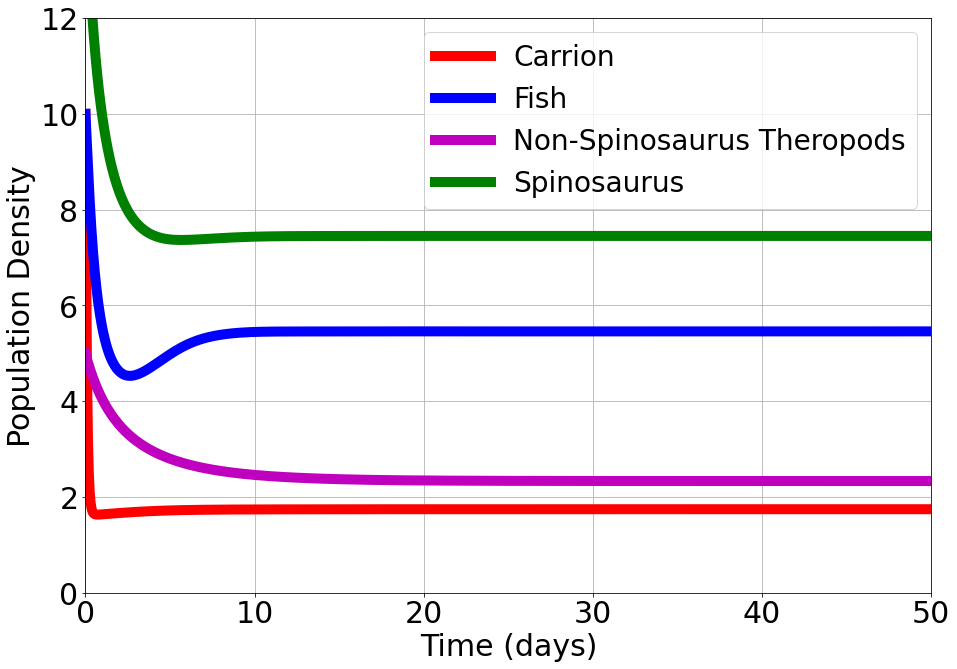

In [7]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

## Sensitivity analysis

### Least-Squares objective function

In [8]:
from SALib.sample.morris import sample as ee_sample

mean_values_params = [
    lambda_T,
    lambda_S,
    alpha,
    beta,
    p,
    d,
    a_S,
    h_S,
    a_T,
    h_T,
    O,
    r_F,
    K_F,
    m_T,
    q_T,
    m_S,
    q_S,
]
factors_names = [
    r"$\lambda_T$",
    r"$\lambda_S$",
    r"$\alpha$",
    r"$\beta$",
    r"$p$",
    r"$d$",
    r"$a_S$",
    r"$h_S$",
    r"$a_T$",
    r"$h_T$",
    r"$O$",
    r"$r_F$",
    r"$K_F$",
    r"$m_T$",
    r"$q_T$",
    r"$m_S$",
    r"$q_S$",
]
params_perturbations = 0.5
problem_info = {
    'num_vars': len(mean_values_params),
    'names': factors_names,
    'bounds': [[param - params_perturbations * param, param + params_perturbations * param] for param in mean_values_params]
}

grid_level = 4
num_of_trajectories = 20
parameter_values = ee_sample(problem_info, grid_level, num_of_trajectories, local_optimization=False, seed=seed)

### Spinosaurus

In [9]:
from tqdm import tqdm

time_list_range = time_list

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_exponential_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Spinosaurus_realization

100%|██████████| 72/72 [00:00<00:00, 158.20it/s]


In [ ]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

 16%|█▌        | 634/4000 [00:03<00:17, 193.11it/s]

In [ ]:
df_sigmai

In [ ]:
import seaborn as sns
import colorcet as cc

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette(cc.glasbey,18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)
#ncol = len(problem_info['names'])

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Spinosaurus_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

In [ ]:
import seaborn as sns
import colorcet as cc

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette(cc.glasbey,18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Spinosaurus_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

### Non-Spinosaurus Theropods

In [ ]:
from tqdm import tqdm

time_list_range = time_list

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_exponential_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Other_Theropods_realization

In [ ]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

In [ ]:
df_sigmai

In [ ]:
import seaborn as sns
import colorcet as cc

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette(cc.glasbey,18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Other_Theropods_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

In [ ]:
import seaborn as sns
import colorcet as cc

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette(cc.glasbey,18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Other_Theropods_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

## Continuation diagram

In [ ]:
plt.rcParams.update({'font.size': 8})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['lines.linewidth'] = BIGGER_SIZE
plt.rcParams.update({'font.size': BIGGER_SIZE})

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions, (t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
#    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


O_min = 0
O_max = 10
O_points = np.linspace(O_min, O_max, num_of_points)
parameter_to_continuation = {"O": O_points}

O_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="O",
    parameter_span=(O_min, O_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        O_values["O"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        O_values["O"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$O$", ylabel=f"{variable_name}", xlim=(O_min, O_max))
    ax.plot(linewidth=15, markersize=20)
    ax.label_outer()

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['lines.linewidth'] = BIGGER_SIZE
plt.rcParams.update({'font.size': BIGGER_SIZE})

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_continuation_O.eps", format='eps', bbox_inches = "tight", dpi=300)

In [ ]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
#    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


r_F_min = 0.1
r_F_max = 10
r_F_points = np.linspace(r_F_min, r_F_max, num_of_points)
parameter_to_continuation = {"r_F": r_F_points}

r_F_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="r_F",
    parameter_span=(r_F_min, r_F_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        r_F_values["r_F"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4]
    axs[index].plot(
        r_F_values["r_F"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$r_F$", ylabel=f"{variable_name}", xlim=(r_F_min, r_F_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_continuation_r_F.eps", format='eps', bbox_inches = "tight", dpi=300)

In [ ]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
#    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


p_min = 10
p_max = 40
p_points = np.linspace(p_min, p_max, num_of_points)
parameter_to_continuation = {"p": p_points}

p_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="p",
    parameter_span=(p_min, p_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        p_values["p"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        p_values["p"], np.round(variable_result,2), color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$p$", ylabel=f"{variable_name}", xlim=(p_min, p_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_continuation_p.eps", format='eps', bbox_inches = "tight", dpi=300)

In [ ]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
    "p": p,
#    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


d_min = 10
d_max = 30
d_points = np.linspace(d_min, d_max, num_of_points)
parameter_to_continuation = {"d": d_points}

d_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="d",
    parameter_span=(d_min, d_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        d_values["d"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        d_values["d"], np.round(variable_result,2), color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$d$", ylabel=f"{variable_name}", xlim=(d_min, d_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
#plt.savefig("img/exponential_density_mediated_continuation_d.eps", format='eps', bbox_inches = "tight", dpi=300)

# No density-mediated interaction

## Parameter values

In [ ]:
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [ ]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [ ]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

In [ ]:
plt.rcParams['lines.linewidth'] = 30
plt.rcParams.update({'font.size': 28})

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

## Sensitivity analysis

### Least-Squares objective function

In [ ]:
from SALib.sample.morris import sample as ee_sample

mean_values_params = [
    p,
    d,
    a_S,
    h_S,
    a_T,
    h_T,
    O,
    r_F,
    K_F,
    m_T,
    q_T,
    m_S,
    q_S,
]
factors_names = [
    r"$p$",
    r"$d$",
    r"$a_S$",
    r"$h_S$",
    r"$a_T$",
    r"$h_T$",
    r"$O$",
    r"$r_F$",
    r"$K_F$",
    r"$m_T$",
    r"$q_T$",
    r"$m_S$",
    r"$q_S$",
]
params_perturbations = 0.5
problem_info = {
    'num_vars': len(mean_values_params),
    'names': factors_names,
    'bounds': [[param - params_perturbations * param, param + params_perturbations * param] for param in mean_values_params]
}

grid_level = 4
num_of_trajectories = 20
parameter_values = ee_sample(problem_info, grid_level, num_of_trajectories, local_optimization=False, seed=seed)

### Spinosaurus

In [ ]:
from tqdm import tqdm

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0
time_list_range = np.linspace(t0, tf + days_to_forecast, step)

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_No_density_mediated = ode_solver_No_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_No_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Spinosaurus_realization

In [ ]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

In [ ]:
df_sigmai

In [ ]:
import seaborn as sns
import colorcet as cc

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette(cc.glasbey,18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Spinosaurus_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

In [ ]:
import seaborn as sns
import colorcet as cc

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette(cc.glasbey,18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Spinosaurus_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

### Non-Spinosaurus Theropods

In [ ]:
from tqdm import tqdm

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0
time_list_range = np.linspace(t0, tf + days_to_forecast, step)

#time_list_range = time_list

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_No_density_mediated = ode_solver_No_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_No_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Other_Theropods_realization

In [ ]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

In [ ]:
df_sigmai

In [ ]:
import seaborn as sns
import colorcet as cc

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette(cc.glasbey,18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Other_Theropods_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

In [ ]:
import seaborn as sns
import colorcet as cc

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette(cc.glasbey,18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Other_Theropods_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

## Continuation diagram

In [ ]:
plt.rcParams.update({'font.size': 8})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['lines.linewidth'] = BIGGER_SIZE
plt.rcParams.update({'font.size': BIGGER_SIZE})

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions, (t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
#    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


O_min = 0
O_max = 10
O_points = np.linspace(O_min, O_max, num_of_points)
parameter_to_continuation = {"O": O_points}

O_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="O",
    parameter_span=(O_min, O_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        O_values["O"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        O_values["O"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$O$", ylabel=f"{variable_name}", xlim=(O_min, O_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/No_density_mediated_continuation_O.eps", format='eps', bbox_inches = "tight", dpi=300)

In [ ]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
#    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


r_F_min = 0.1
r_F_max = 10
r_F_points = np.linspace(r_F_min, r_F_max, num_of_points)
parameter_to_continuation = {"r_F": r_F_points}

r_F_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="r_F",
    parameter_span=(r_F_min, r_F_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        r_F_values["r_F"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        r_F_values["r_F"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$r_F$", ylabel=f"{variable_name}", xlim=(r_F_min, r_F_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/No_density_mediated_continuation_r_F.eps", format='eps', bbox_inches = "tight", dpi=300)

In [ ]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
#    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


p_min = 10
p_max = 40
p_points = np.linspace(p_min, p_max, num_of_points)
parameter_to_continuation = {"p": p_points}

p_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="p",
    parameter_span=(p_min, p_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        p_values["p"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        p_values["p"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$p$", ylabel=f"{variable_name}", xlim=(p_min, p_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/No_density_mediated_continuation_p.eps", format='eps', bbox_inches = "tight", dpi=300)

In [ ]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "p": p,
#    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


d_min = 10
d_max = 30
d_points = np.linspace(d_min, d_max, num_of_points)
parameter_to_continuation = {"d": d_points}

d_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="d",
    parameter_span=(d_min, d_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        d_values["d"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        d_values["d"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$d$", ylabel=f"{variable_name}", xlim=(d_min, d_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
#plt.savefig("img/No_density_mediated_continuation_d.eps", format='eps', bbox_inches = "tight", dpi=300)

# Complementary analyses

# No density-mediated interaction

## Parameter values

In [ ]:
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [ ]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [ ]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

In [ ]:
plt.rcParams['lines.linewidth'] = 30
plt.rcParams.update({'font.size': 28})

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

# Addition of the Crocodylomorpha functional group 

# Exponential Density-Mediated Interaction

## Parameter values

In [ ]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1
a_R=1
h_R=1
m_R=0.1
q_R=0.1

y0 = np.array([10, 10, 5, 15, 5])

In [ ]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    C, F, T, S, R = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_R * F * R / ( 1 + a_R * h_R * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    R_prime = ( a_R * F * R ) / ( 1 + a_R * h_R * F ) - m_R * R - q_R * R**2
    return C_prime, F_prime, T_prime, S_prime, R_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S,a_R,h_R,m_R,q_R),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [ ]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S, a_R=a_R, h_R=h_R, m_R=m_R, q_R=q_R)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus, Crocodylomorpha = y_computed_exponential_density_mediated

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

#ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
#ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
#ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")
ax.plot(time_list, Crocodylomorpha, label="Crocodylomorpha", linestyle="-", linewidth=10, markersize=12,color="y")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

#plt.savefig('img/exponential_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

# No density-mediated interaction

## Parameter values

In [ ]:
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1
a_R=1
h_R=1
m_R=0.1
q_R=0.1

y0 = np.array([10, 10, 5, 15, 5])

In [ ]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    C, F, T, S, R = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_R * F * R / ( 1 + a_R * h_R * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    R_prime = ( a_R * F * R ) / ( 1 + a_R * h_R * F ) - m_R * R - q_R * R**2
    return C_prime, F_prime, T_prime, S_prime, R_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S,a_R,h_R,m_R,q_R),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [ ]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S, a_R=a_R, h_R=h_R, m_R=m_R, q_R=q_R)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus, Crocodylomorpha = y_computed_No_density_mediated

In [ ]:
plt.rcParams['lines.linewidth'] = 30
plt.rcParams.update({'font.size': 28})

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")
ax.plot(time_list, Crocodylomorpha, label="Crocodylomorpha", linestyle="-", linewidth=10, markersize=12,color="y")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

#plt.savefig('img/No_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Sauropods and others 

## Exponential Density-Mediated Interaction

## Parameter values

In [ ]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [ ]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [ ]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_O.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [ ]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [ ]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_O.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Fishes

## Exponential Density-Mediated Interaction

## Parameter values

In [ ]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 0, 5, 15])

In [ ]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [ ]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_F.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [ ]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [ ]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_F.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Fishes and Sauropods and others 

## Exponential Density-Mediated Interaction

## Parameter values

In [ ]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 0, 5, 15])

In [ ]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [ ]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_FO.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [ ]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [ ]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_FO.eps', format='eps')
plt.tight_layout()
plt.show()